<a href="https://colab.research.google.com/github/JPLAVALLEY/kaggle/blob/master/House_Prices_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition for House Prices: Advanced Regression Techniques

Use the data in train.csv to predict the sale price in test.csv

Upload my kaggle.json API file

In [1]:
   from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jplavalley","key":"6b3c042d9370b332481115da40efebc2"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change permission
!chmod 600 ~/.kaggle/kaggle.json

In [54]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')

In [56]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.shape

(1460, 81)

In [57]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
# First lets check for missing values
# Missing values counts in each column

missing_count = (df_train.isnull().sum() / len(df_train)) * 100

# filter to find missing count > 0
missing_count = missing_count[missing_count > 0]

print(missing_count)


LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


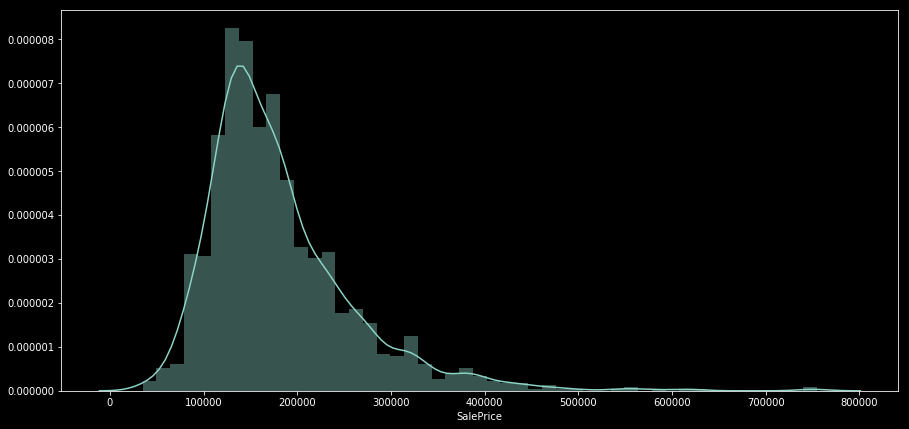

In [59]:
# we need to handle the missing columns

plt.figure(figsize=(15,7))
sns.distplot(df_train['SalePrice'])

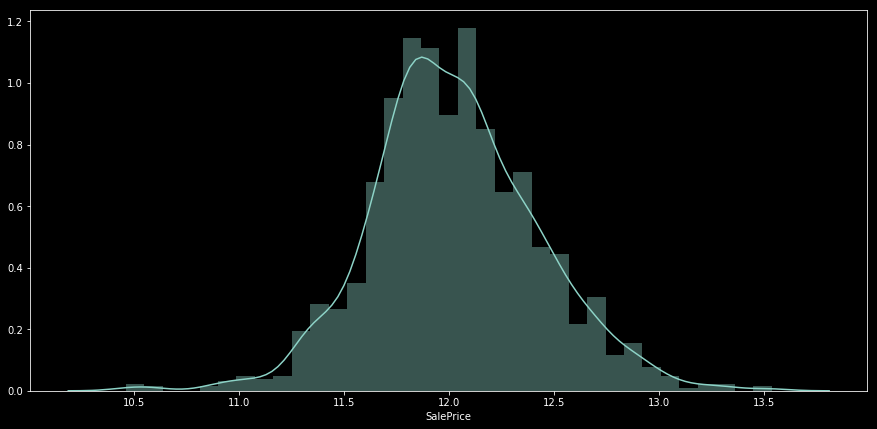

In [60]:
# Our data is not normalized
# Right skewed, many records for low price houses and not many for high price houses
# Most machine learning algorithm works well with data which are normally distributed
#Let's transform the target (SalePrice) variable by taking log scale

target = np.log(df_train['SalePrice'])

plt.figure(figsize=(15,7))
sns.distplot(target)

In [61]:
# this is more normally distributed than our original SalePrice
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

# Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
format(numeric_data.shape[1], categorical_data.shape[1]))  

# Lets make this a function so we can use it later as well
def Num_Cat_Count():
    # Finding numerical features
    numeric_data = df_train.select_dtypes(include = [np.number])

    # Finding categorical features
    categorical_data = df_train.select_dtypes(exclude = [np.number])

    # Let's print how many numerical and categorical features do we have
    print('There are {0} numerical and {1} categorical features in the training data'.\
        format(numeric_data.shape[1], categorical_data.shape[1]))    
    
#Num_Cat_Count()

There are 38 numerical and 43 categorical features in the training data


In [62]:
# Correlation plot for the numerical features

categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

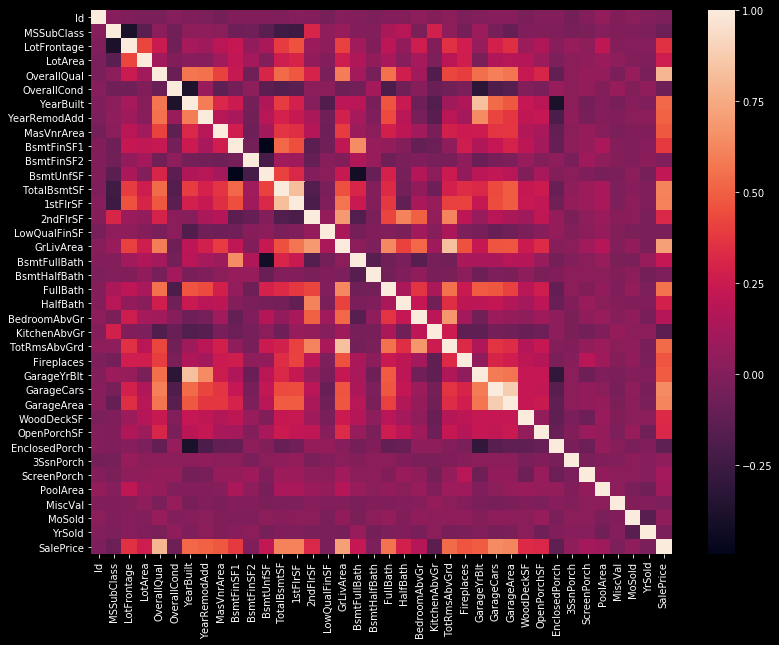

In [63]:
# Correlation plot of the feature in numeric_data

corr = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(13,10))
sns.heatmap(corr)

# Lighter color means greater correlation

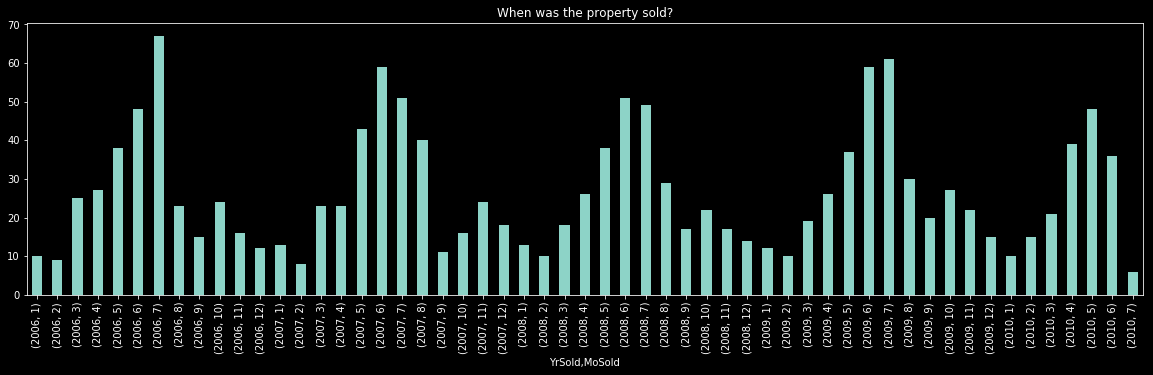

In [64]:
# When was the property sold in which year and month

df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(20,5))
plt.title('When was the property sold?')
plt.show()

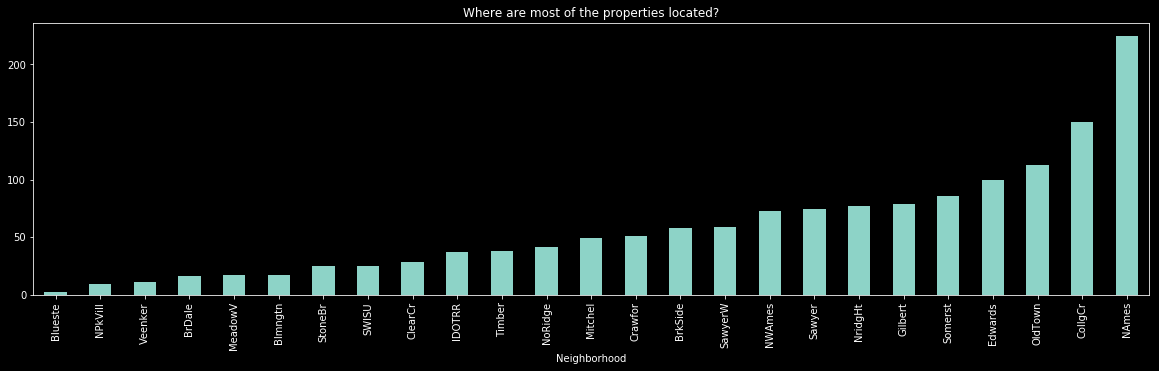

In [65]:
# Where are the properties located?

df_train.groupby('Neighborhood').Id.count(). \
    sort_values().\
    plot(kind='bar', figsize=(20,5))
plt.title('Where are most of the properties located?')
plt.show()

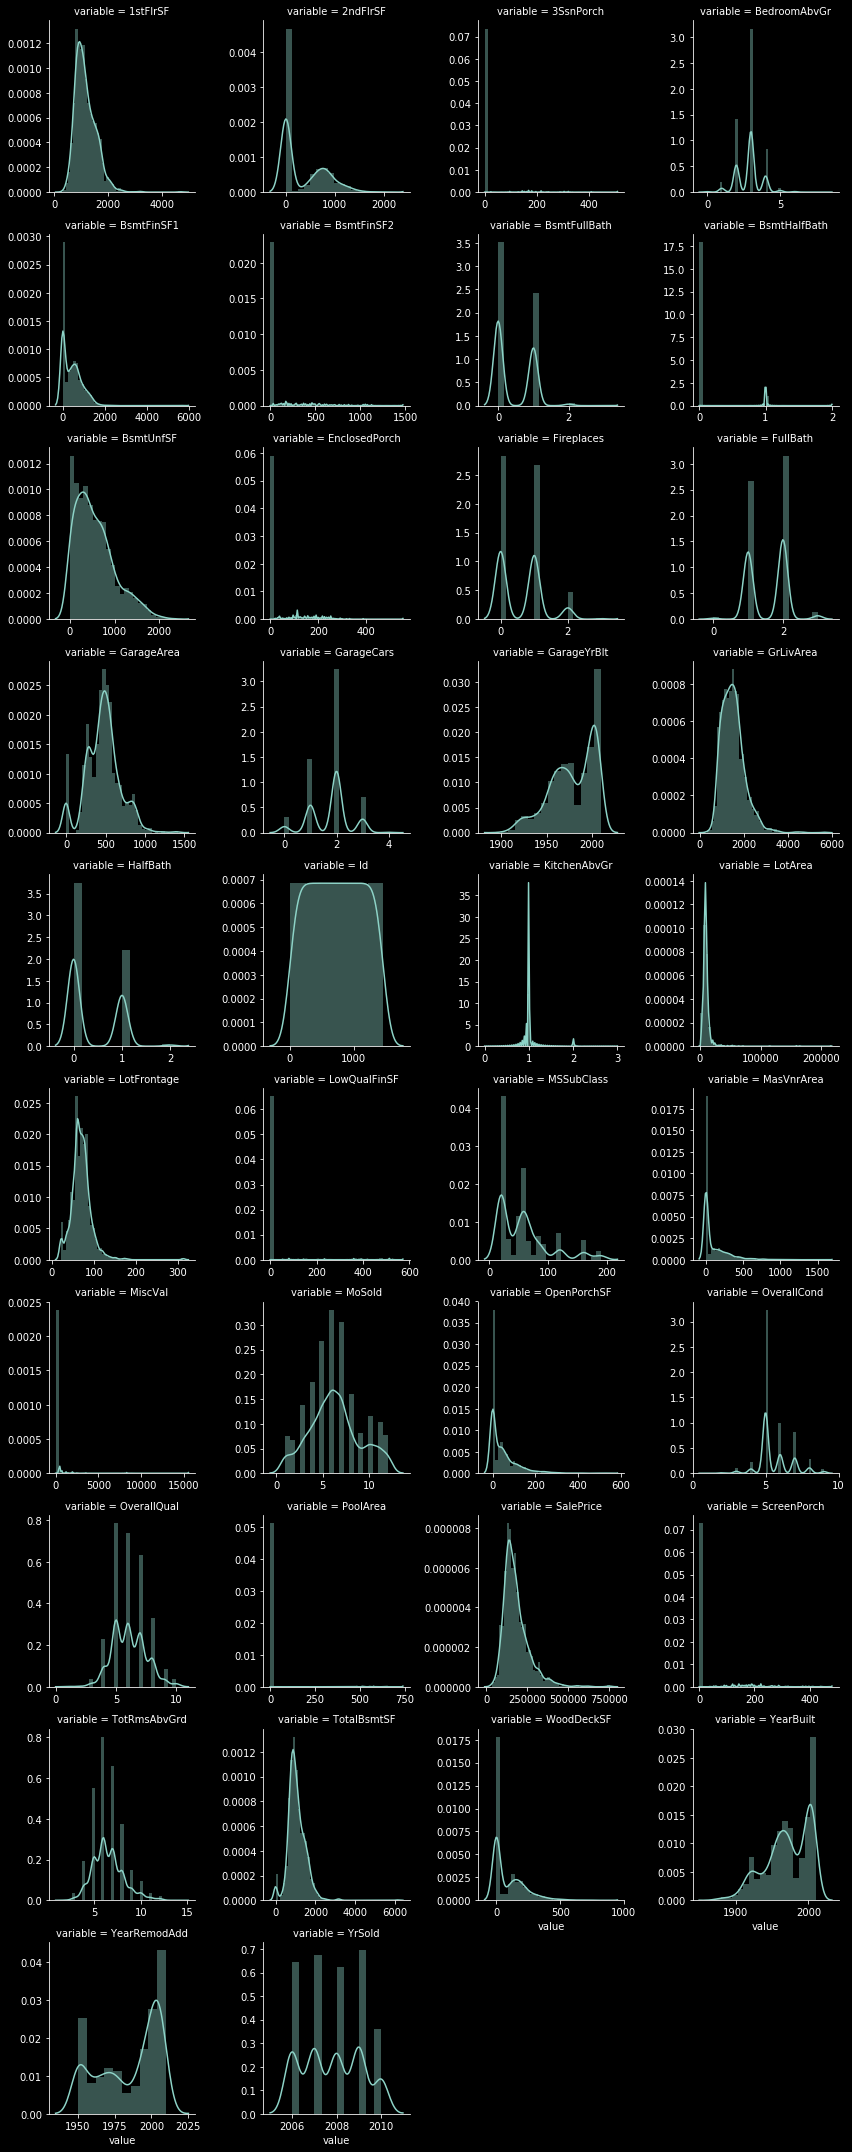

In [66]:
# Distribution of numerical features

f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [0]:
# Conversion from Numeric Feature to Category features

df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['MoSold'] = df_train.MoSold.apply(lambda x: str(x))
df_train['YrSold'] = df_train.YrSold.apply(lambda x: str(x))

In [68]:
Num_Cat_Count()

There are 35 numerical and 46 categorical features in the training data


In [69]:
numeric_data = df_train.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

# Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
format(numeric_data.shape[1], categorical_data.shape[1]))  

There are 35 numerical and 46 categorical features in the training data


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


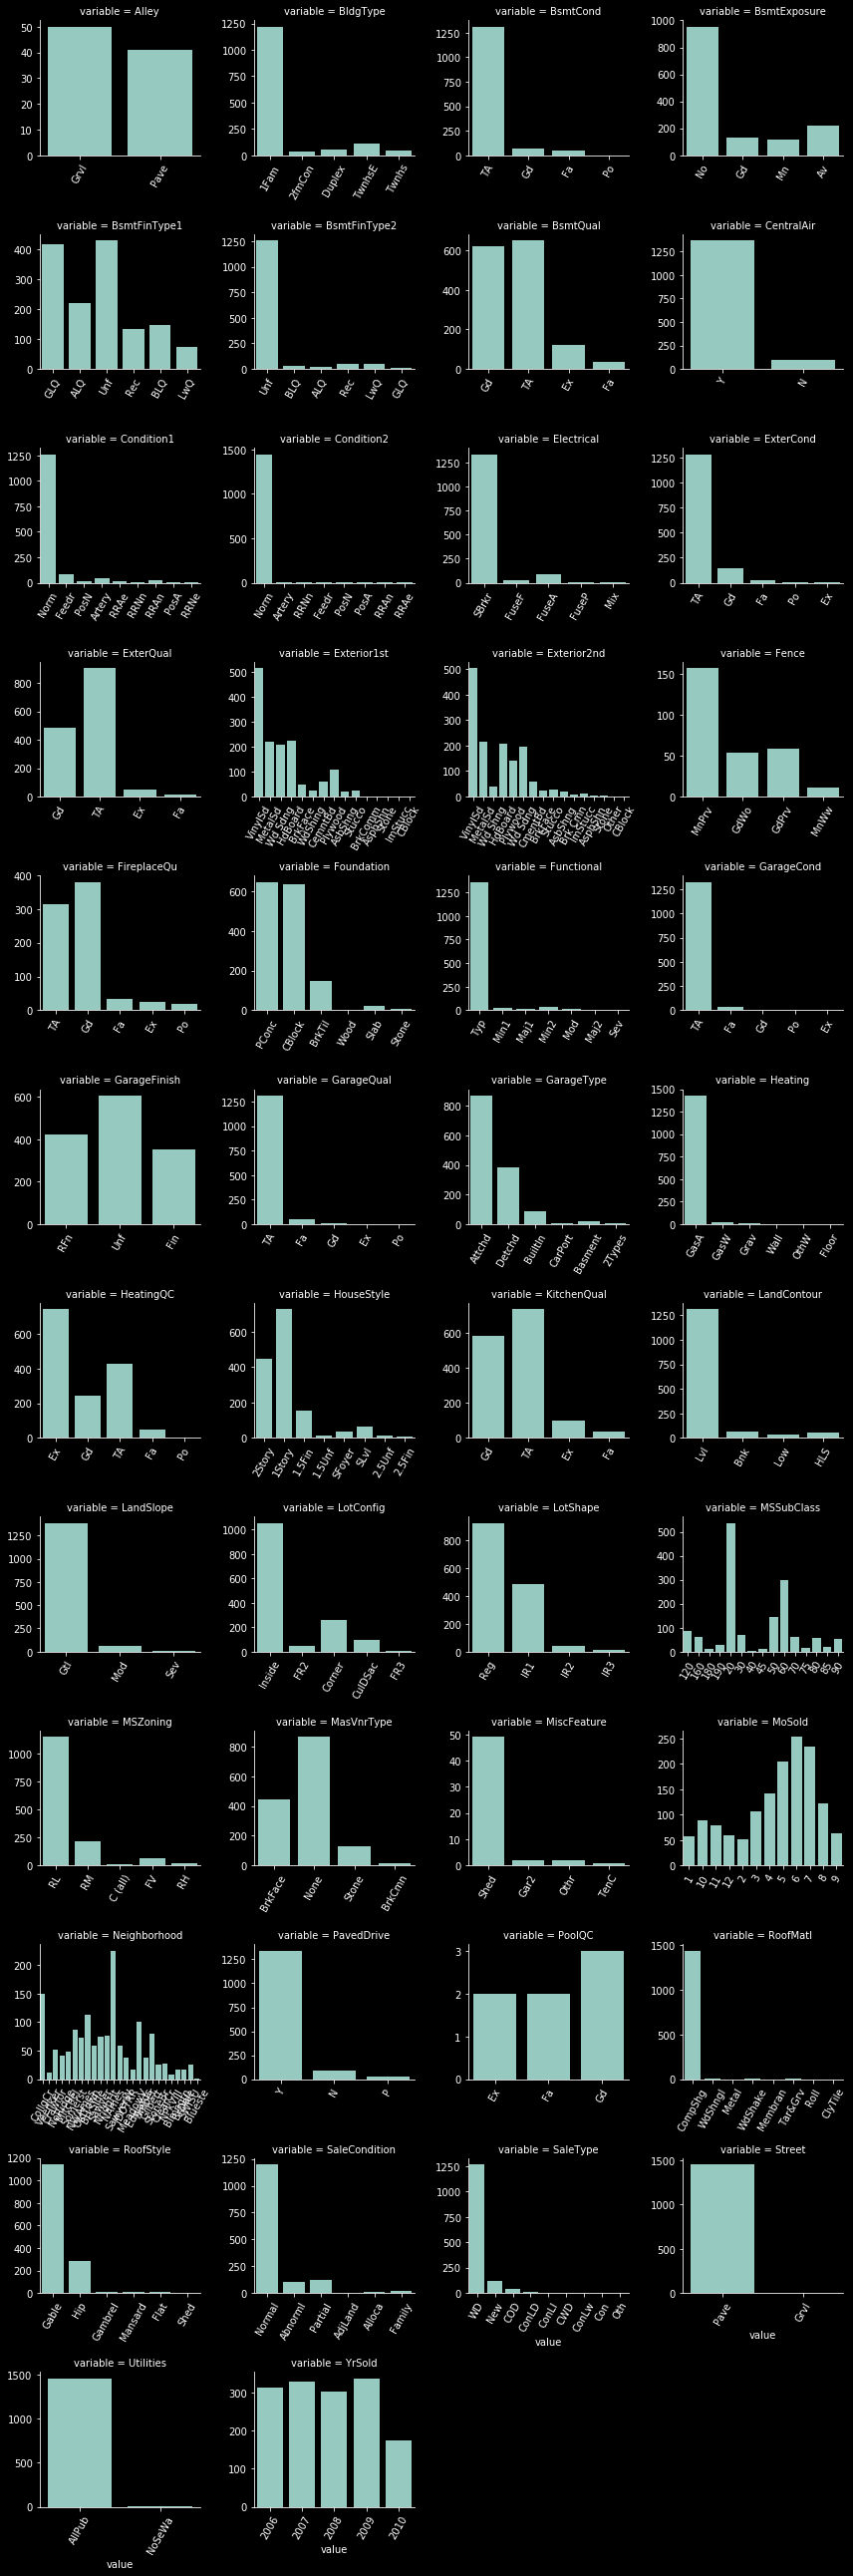

In [70]:
# Let's get a plot count of categorical features

f = pd.melt(df_train, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


In [71]:
'''
Categorical columns who text/string values to be converted to numerical values

Alley, LotShape, LandContour, utilities, LandSlope, ExterQual, 
ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQuality, GarageCond, PavedDrive, PoolQC
'''

'\nCategorical columns who text/string values to be converted to numerical values\n\nAlley, LotShape, LandContour, utilities, LandSlope, ExterQual, \nExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,\nHeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQuality, GarageCond, PavedDrive, PoolQC\n'

In [0]:
#This could have been done with a label encoder, doing this manually for now

#Alley
df_train.Alley.replace({'Grvl':1, 'Pave':2},inplace=True)


# Lot Shape
df_train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4},inplace=True)

#Building Type
#df_train.BldgType.replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5},inplace=True)

#Land Countour
df_train.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4},inplace=True)

#Utilities
df_train.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4},inplace=True)

#LandSlope
df_train.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3},inplace=True)

#ExterQual
df_train.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#ExterCond
df_train.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#BsmtQual
df_train.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#BsmtCond
df_train.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#BsmtExposure
df_train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4},inplace=True)

#BsmtFinType1
df_train.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},inplace=True)

#BsmtFindType2
df_train.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},inplace=True)

#HeatingQC
df_train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#KitchenQual
df_train.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#Functional
df_train.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},inplace=True)

#FireplaceQA
df_train.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#GarageFinish
df_train.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3},inplace=True)

#GarageQuality
df_train.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#GarageCond
df_train.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)

#PavedDrive
df_train.PavedDrive.replace({'N':1, 'P':2, 'Y':3},inplace=True)

#PoolQC
df_train.PoolQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)



In [0]:
cat_to_num_Features = ['Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual',
                      'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                      'HeatingQC', 'KitchenQual',  'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual',
                      'GarageCond', 'PavedDrive', 'PoolQC']

df_train[cat_to_num_Features] = df_train[cat_to_num_Features] .fillna(0)

In [74]:
Num_Cat_Count()

There are 56 numerical and 25 categorical features in the training data


In [0]:
# Box plot to analyse the means of categorical features
# Null Hypothesis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


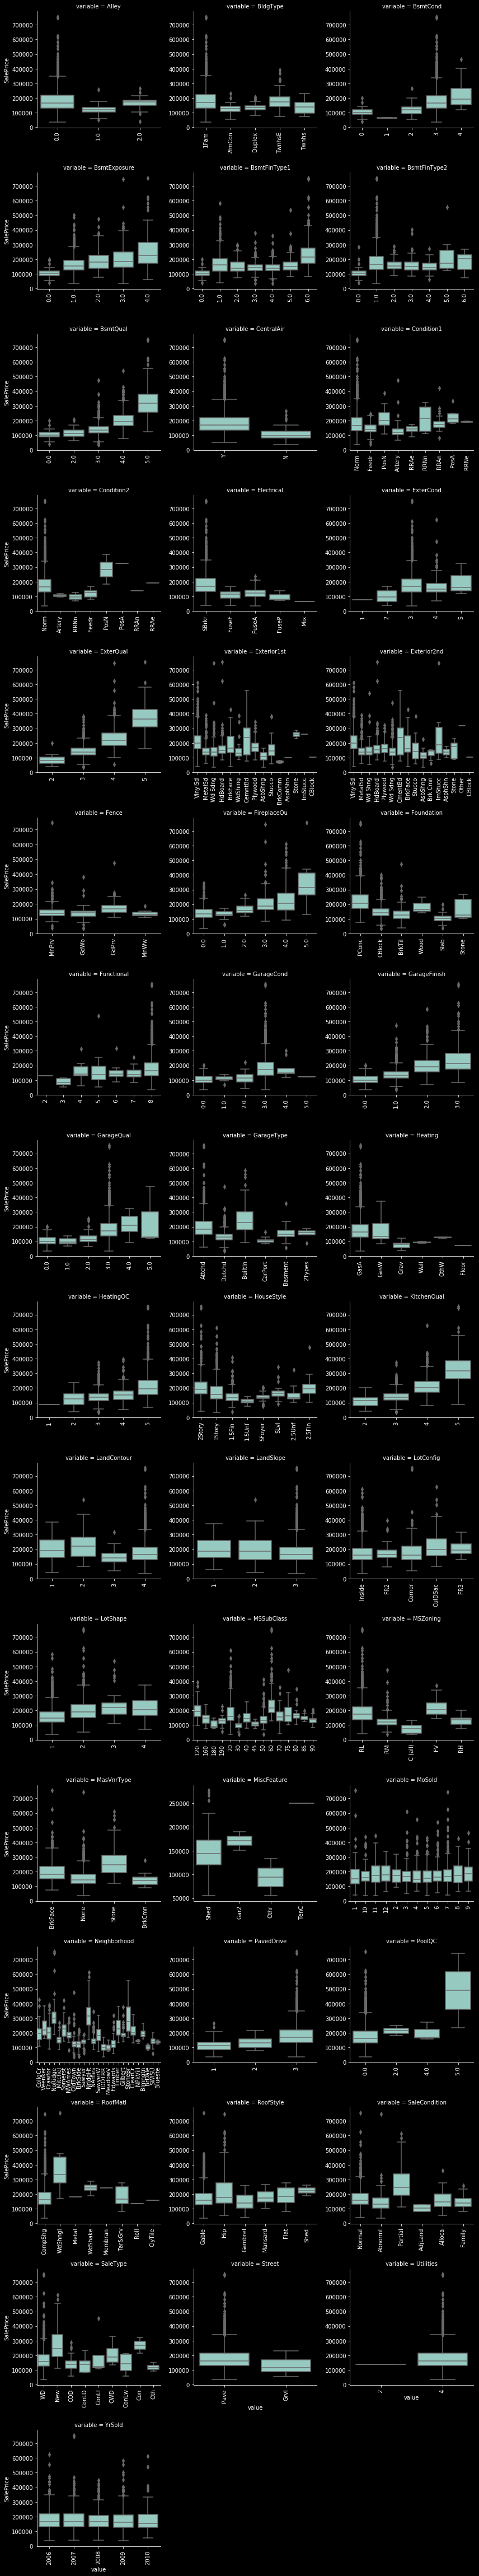

In [76]:
# Count plots of categorical features

f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [0]:
#Creates a function called anova to give us anova review of our catergorical data


import scipy.stats
cat_features = categorical_data.columns
df_train[cat_features] = df_train[cat_features].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in df_train[cat].unique():
        group_prices.append(df_train[df_train[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature', 'f', 'p']]
anova.sort_values('p', inplace=True)

In [78]:
# we want p < 0.05

anova

,feature,f,p
9,Neighborhood,71.784865,1.558600e-225
19,ExterQual,443.334831,1.439551e-204
22,BsmtQual,316.148635,8.158548e-196
31,KitchenQual,407.806352,3.032213e-192
35,GarageFinish,213.867028,6.228747e-115
33,FireplaceQu,121.075121,2.971217e-107
21,Foundation,100.253851,5.791895e-91
34,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
25,BsmtFinType1,64.688200,2.386358e-71


<function matplotlib.pyplot.show>

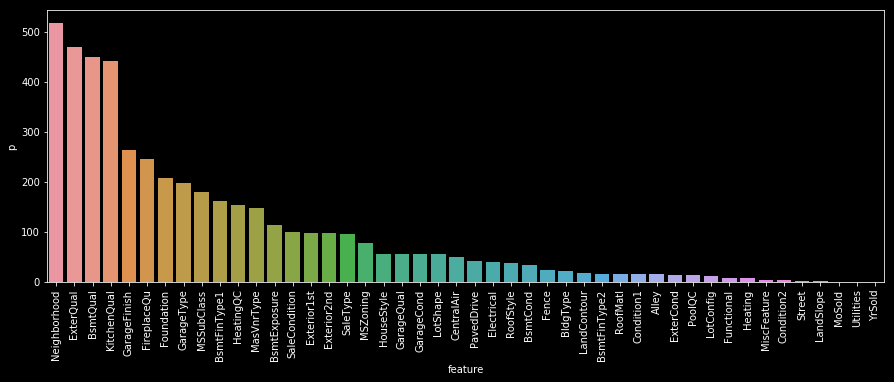

In [79]:
#categories on the left have the largest impact
plt.figure(figsize=(15,5))
sns.barplot(anova.feature, np.log(1/anova['p']))
plt.xticks(rotation=90)
plt.show

In [0]:
# Handling missing values

In [81]:
missing_values = (df_train[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

df_train.loc[df_train.Electrical == 'Missing', 'Electrical'] = df_train.Electrical.mode()[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


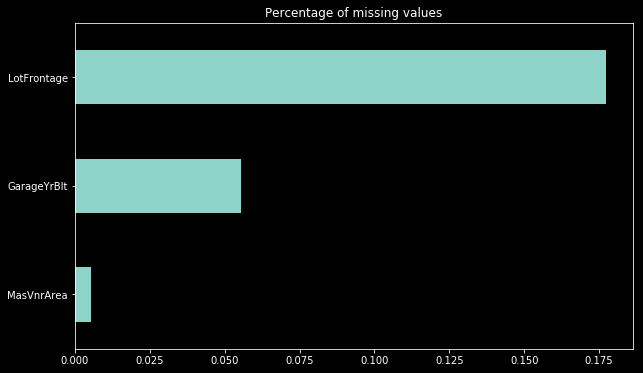

In [82]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()


In [0]:
# Lot Frontage (how can there be no street infront of the lot) Hence we replace it with the median value.
df_train.LotFrontage = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#Garage Year Built, if missing we can set it to zero
df_train.GarageYrBlt.fillna(0, inplace=True)

#Masonary Veneer Area here most values are zero
df_train.MasVnrArea.fillna(0, inplace=True)

In [0]:
# Let's closely look into the MasVnrType field here

#First let's correct our assignment
df_train.MasVnrType.replace({'Missing':'None'}, inplace=True)

#Second, we are going to replace them with the mean value

df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' #most common
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea == 1), 'MasVnrArea'] = 0 # 1 sq ft is basically 0
for vnr_type in df_train.MasVnrType.unique():
    # so here we set the area equal to the mean of the given veneer type
    df_train.loc[(df_train.MasVnrType == vnr_type) & (df_train.MasVnrArea == 0), 'MasVnrArea'] = \
        df_train[df_train.MasVnrType == vnr_type].MasVnrArea.mean()

In [85]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [86]:
# Check whether duplicates are available

print('Train set duplicate IDs: {}'.format(df_train.duplicated('Id').sum()))
print('Test set duplicate IDs {}'.format(df_test.duplicated('Id').sum()))

Train set duplicate IDs: 0
Test set duplicate IDs 0


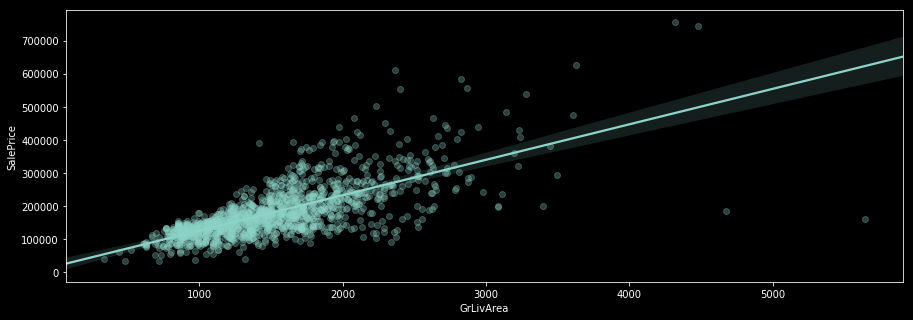

In [87]:
# Check for outliers

plt.figure(figsize=(15,5))
sns.regplot(df_train.GrLivArea, df_train.SalePrice, scatter_kws={'alpha':0.3})
plt.show()


In [0]:
#Removing houses which has more than 4000 sq ft.
df_train.drop(df_train[df_train.GrLivArea >= 4000].index, inplace=True)

In [0]:
#Calculating total square feet (area)
df_train['TotalSF'] = df_train.TotalBsmtSF + df_train.GrLivArea
df_train['TotalFloorSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalPorchSF'] = df_train.OpenPorchSF +df_train.EnclosedPorch + \
    df_train['3SsnPorch'] + df_train['ScreenPorch']

In [0]:
# Now let's create some boolean features (Yes-No type)

df_train['HasBasement'] = df_train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasGarage'] = df_train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPorch'] = df_train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPool'] = df_train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
df_train['WasRemodeled'] = (df_train.YearRemodAdd != df_train.YearBuilt).astype(np.int64)
df_train['IsNew'] = (df_train.YearBuilt > 2000).astype(np.int64)
df_train['WasCompleted'] = (df_train.SaleCondition != 'Partial').astype(np.int64)

In [0]:
boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 'WasRemodeled', 'IsNew', 'WasCompleted']

In [92]:
Num_Cat_Count()

num_features = numeric_data.columns
cat_features = categorical_data.columns

There are 66 numerical and 25 categorical features in the training data


In [0]:
num_features = [f for f in num_features if f not in boolean_features]

In [0]:
#Total Bathrooms

df_train['TotalBathrooms'] = df_train.FullBath + .5 * df_train.HalfBath + \
    df_train.BsmtFullBath + .5 * df_train.BsmtHalfBath

In [95]:
Num_Cat_Count()

There are 67 numerical and 25 categorical features in the training data


# Housing Price Prediction

In [0]:
features = num_features + ['SalePrice']
for f in features:
    df_train.loc[:,f] = np.log1p(df_train[f])

In [0]:
#Set up our training data to make predictions
y = df_train['SalePrice']
df_train.drop('SalePrice', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)

#Get dummies one-hot encoding method
model_data = pd.get_dummies(df_train).copy()


In [100]:
#Our Model Data
model_data.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,0.0,1,4,4,3,2.079442,1.791759,7.602900,7.602900,5.283204,4,3,4.0,3,1.0,6.0,6.561031,1.0,0.0,5.017280,6.753438,5,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,4,2.197225,8,0.000000,0.0,7.602900,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,0.0,1,4,4,3,1.945910,2.197225,7.589336,7.589336,0.000000,3,3,4.0,3,4.0,5.0,6.886532,1.0,0.0,5.652489,7.141245,5,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,3,1.945910,8,0.693147,3.0,7.589336,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,0.0,2,4,4,3,2.079442,1.791759,7.601902,7.602401,5.093750,4,3,4.0,3,2.0,6.0,6.188264,1.0,0.0,6.075346,6.825460,5,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,4,1.945910,8,0.693147,3.0,7.601902,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,0.0,2,4,4,3,2.079442,1.791759,7.557995,7.586296,0.000000,3,3,3.0,4,1.0,5.0,5.379897,1.0,0.0,6.293419,6.629363,4,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,4,2.079442,8,0.693147,4.0,7.600402,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,0.0,2,4,4,3,2.197225,1.791759,7.601402,7.601402,5.860786,4,3,4.0,3,3.0,6.0,6.486161,1.0,0.0,6.196444,7.044033,5,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,4,2.302585,8,0.693147,3.0,7.601402,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [101]:
# We are only using our training data here
# Splits our data into training and testing data for model development

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train', y_train.shape)
print('y_val', y_test.shape)

Shapes
X_train: (1019, 263)
X_val: (437, 263)
y_train (1019,)
y_val (437,)
